# Research Paper Notebook

## Abstract

This paper showcases how reality deviates from economic theory and whether media coverage drives these deviations when analyzing immigration's impact on labor force participation. Understanding the relationship between immigration, media coverage, and fluctuations in native-born labor force participation is key to decreasing negative implications. These findings grow more important as rhetoric becomes more polarized and changes in labor force participation grow more alarming.

The paper's objective is to analyze combinations of various immigration types (ex. high-skill substitutions) and media publications during the same period. An index is created from the results to better understand how the variables are correlated.

The findings of the paper support the hypothesis that deviations from economic theory will align with moments where related media coverage was predominantly negative. This paper was produced to contribute to more nuanced discussions regarding immigration.

The methodology used is a combination of statistical models and case studies. This paper builds on the work of Ríos‐Avila's insights regarding immigration and native-born unemployment and discouragement (Ríos‐Avila, 2016). Additionally, the paper shall expand on trends surrounding native internal migration (Borjas, 2021) (Card, 2001). Finally, the paper's findings use Scheve's work regarding deviations between real-world results and theory as a foundation (Scheve, 2001). 

## Introduction

Recently, immigration policy has fueled contentious debates, particularly concerning its impact on native-born individuals. Amidst extensive media coverage, many narratives have emerged.

This paper focuses on media coverage surrounding immigration policy to note if any changes in labor participation, or deviation from economic theory, can be directly correlated to media coverage. Leveraging AI-powered systems, narratives surrounding immigration will be analyzed. Instead of researching reputable news sources, "X" will be used for data collection due to it being a core destination where people access the news. With this data collection strategy, misinformation and core publications will be represented but through an additional variable, core publications will have a heavier weight. This weighting is necessary for core publications tend to have more public trust and a higher likelihood of programs and policies being influenced by these reports.

The methodology to track the economic impacts media has on labor force participation is to establish predictions based on economic theory as a baseline. From this baseline, real-world findings will be mapped on the same axes to show the magnitude of deviation. Periods with deviation will be noted and the media coverage during the same period will analyzed to note its potential influence. By recognizing the correlation between these two variables, a conclusion can be made regarding the potential relationship between media and labor force participation. 

Current literature will be referenced to offer context and a backdrop for the paper's findings within the academic world. The core difference between the predicted findings of this paper and the current literature is that this paper aims to understand the potential drivers of change in labor force participation when immigration takes place.

To ensure nuances of immigration policy are represented, the four immigration types will be analyzed: immigrants are high-skilled complements, immigrants are low-skilled complements, immigrants are high-skilled substitutes, and immigrants are low-skilled substitutes. An example of a high-skill substitute may be immigrants who are brought to work within innovative sectors like the technology sector. In direct contrast, an example of a low-skilled substitute maybe someone working a job in construction.

The findings expand on Ríos‐Avila's analysis surrounding immigration’s impact on native-born unemployment and discouragement(Ríos‐Avila, 2016). Our paper notes the dominant public perception at the time regarding immigration and how this correlates with the unemployment or discouragement highlighted by Ríos‐Avila.

The paper also builds on trends highlighted by Borjas and Card surrounding native internal migration (Borjas, 2021) (Card, 2001). By comparing immigration influxes and media coverage, our findings showcase the correlation between Borjas' and Card's migrations and narratives in the media. Scheve's work acts as a foundational piece for our analysis as it establishes core differences between theory and literature regarding labor-market competition and immigration policy (Scheve, 2001). Card's research surrounding the effects of the Mariel Boatlift was also fundamental to our analysis(Card, 1990). Both pieces help ground the findings of this paper in a medium that allows for further applications outside of the literary realm. 

The Mariel Boatlift is a core case study for both the direct impacts of immigration on the Miami labor market can be tracked, and the media coverage surrounding this event can be analyzed to gauge its influence on the findings. The paper will take into consideration how the randomness of the sample may impact the scalability of the findings.

Inspired by Dustmann, a model will be introduced to highlight how media coverage drove the changes witnessed in labor force participation(Dustmann, 2008). 

The findings support the hypothesis that deviations from economic theory will align with moments where media coverage surrounding immigration was predominantly negative. These deviations will also be reflected in labor force participation in a similar fashion. This prediction was made under the current notion that media can heavily influence public sentiment. This hypothesis extends this notion to highlight that media can transitively also influence labor market dynamics. 

These findings will contribute to more nuanced discussions on immigration by highlighting the diversity among immigrant types, their economic impacts, and the impact of media coverage. In summary, by highlighting the diversity among immigrant types, their economic impacts, and the influence of media coverage this paper aims to understand the drivers behind deviations from labor economic models regarding immigration.

## Data

In [44]:
# Load necessary libraries

#run regressions
import statsmodels.api as sm

#data manipulation
import pandas as pd
import numpy as np

#plotting tools 
import matplotlib.pyplot as plt

#data to be mentioned
import datetime

import math

#as creates a shorthand for mentioning it

In [45]:
# Import CSV file and read data

url = "https://github.com/galibest2/as.180.369/blob/main/contrib/galibest2/immigration_gtrend.csv?raw=true"
temp = pd.read_csv(url,dtype=str)
df_trend = pd.DataFrame(temp)

df_trend.rename(columns = {'Month':'Date', 'pro immigration: (United States)':'pro narrative',
                              'anti immigration: (United States)':'neg narrative', 
                              'immigration policy: (United States)':'policy'}, inplace = True)

print(df_trend)

        Date pro narrative neg narrative policy
0    2008-01             0             0     53
1    2008-02             0             0     18
2    2008-03             0             0      0
3    2008-04             0             0     20
4    2008-05             0             0     34
..       ...           ...           ...    ...
185  2023-06             0             9     23
186  2023-07             0             0      0
187  2023-08             0             0     35
188  2023-09             0             0     29
189  2023-10             0             0      0

[190 rows x 4 columns]


In [46]:
# Add a specific day (e.g., the first day of the month)
df_trend['Date'] = df_trend['Date'] + '-01'

# Convert the complete date string to a datetime object
df_trend['Date'] = pd.to_datetime(df_trend['Date'])
df_trend['Date'] = df_trend['Date'].dt.normalize()
df_trend['Date'] = df_trend['Date'].dt.floor('D')
print(df_trend.head)

<bound method NDFrame.head of           Date pro narrative neg narrative policy
0   2008-01-01             0             0     53
1   2008-02-01             0             0     18
2   2008-03-01             0             0      0
3   2008-04-01             0             0     20
4   2008-05-01             0             0     34
..         ...           ...           ...    ...
185 2023-06-01             0             9     23
186 2023-07-01             0             0      0
187 2023-08-01             0             0     35
188 2023-09-01             0             0     29
189 2023-10-01             0             0      0

[190 rows x 4 columns]>


In [47]:
df_trend.dtypes

Date             datetime64[ns]
pro narrative            object
neg narrative            object
policy                   object
dtype: object

In [99]:
df_trend["pro narrative"] = pd.to_numeric(df_trend["pro narrative"])

df_trend["neg narrative"] = pd.to_numeric(df_trend["neg narrative"])

df_trend["policy"] = pd.to_numeric(df_trend["policy"])

In [100]:
df_trend.dtypes

Date                 datetime64[ns]
pro narrative                 int64
neg narrative                 int64
policy                        int64
Overall Sentiment             int64
dtype: object

<Axes: xlabel='Date'>

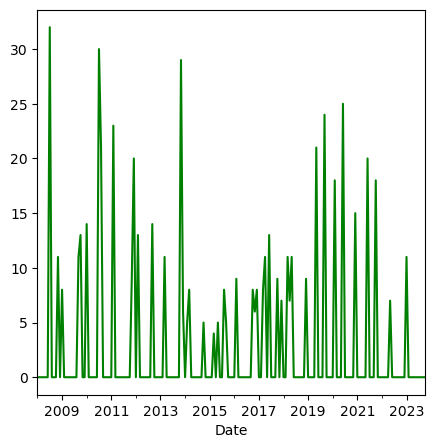

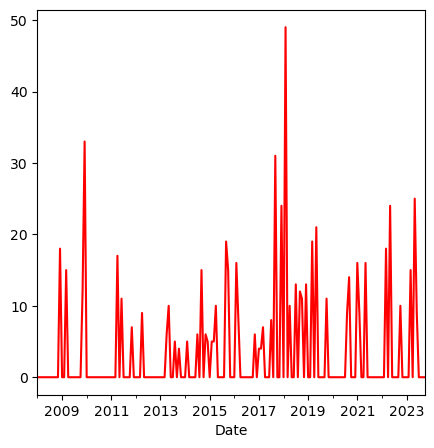

In [101]:
# Graphing the Data Frame

df_trend.plot(x="Date", y=["pro narrative"],figsize=(5,5), color = 'green', legend = False)
df_trend.plot(x="Date", y=["neg narrative"],figsize=(5,5), color = 'red', legend = False)

#Error in finding numerical data

In [102]:
df_trend["Overall Sentiment"] = df_trend["pro narrative"]- df_trend["neg narrative"]
df_trend

,Date,pro narrative,neg narrative,policy,Overall Sentiment
0,2008-01-01,0,0,53,0
1,2008-02-01,0,0,18,0
2,2008-03-01,0,0,0,0
3,2008-04-01,0,0,20,0
4,2008-05-01,0,0,34,0
...,...,...,...,...,...
185,2023-06-01,0,9,23,-9
186,2023-07-01,0,0,0,0
187,2023-08-01,0,0,35,0
188,2023-09-01,0,0,29,0


In [103]:
sentmin = df_trend["Overall Sentiment"].min()
sentmax = df_trend["Overall Sentiment"].max()

range = 0

def roundup(x):
    return math.ceil(x / 10.0) * 10

if abs(sentmin) >= abs(sentmax):
    range = abs(sentmin)

else:
    range = abs(sentmax)

#print(sentmin)
#print(sentmax)
#print(range)

range = roundup(range)

#print(range)




<Axes: xlabel='Date'>

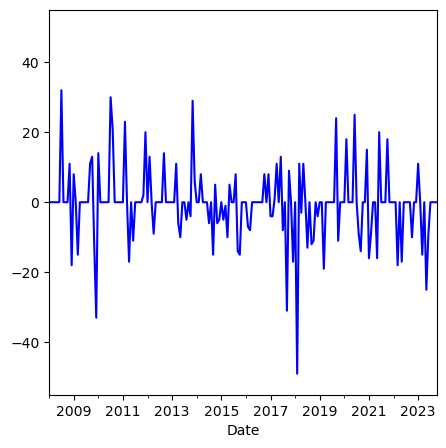

In [104]:
df_trend.plot(x="Date", y=["Overall Sentiment"], figsize=(5,5), color = 'blue', legend = False, 
              ylim = (-range - 5 ,range + 5))

<Axes: xlabel='Date'>

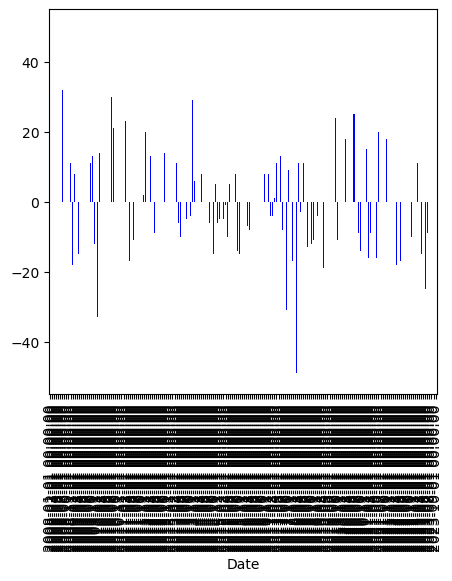

In [105]:
years = []

for i in df_trend["Date"]:
    if i.year in years:
        continue
    else:
        years.append(i.year)

#print(years)

df_trend.plot(x="Date", y=["Overall Sentiment"], kind = "bar", figsize=(5,5), color = 'blue', 
              legend = False, ylim = (-range - 5 ,range + 5))


## While I could fix the x-axis, I feel that this graph does not represent the data as well as the one above


<Axes: title={'center': 'Magnitude of Positive or Negative Sentiment'}, xlabel='Date'>

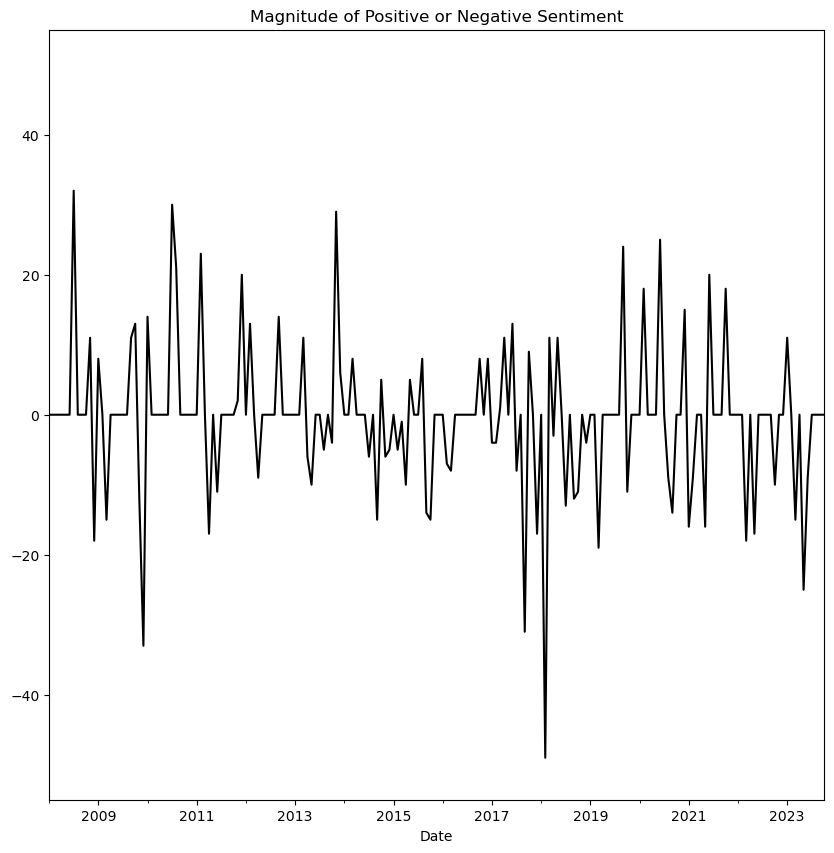

In [106]:
df_trend.plot(x="Date", y=["Overall Sentiment"], figsize=(10,10), color = 'black', legend = False, 
              ylim = (-range - 5 ,range + 5), title = "Magnitude of Positive or Negative Sentiment")



<Axes: title={'center': 'Interest in Immigration Policy'}, xlabel='Date'>

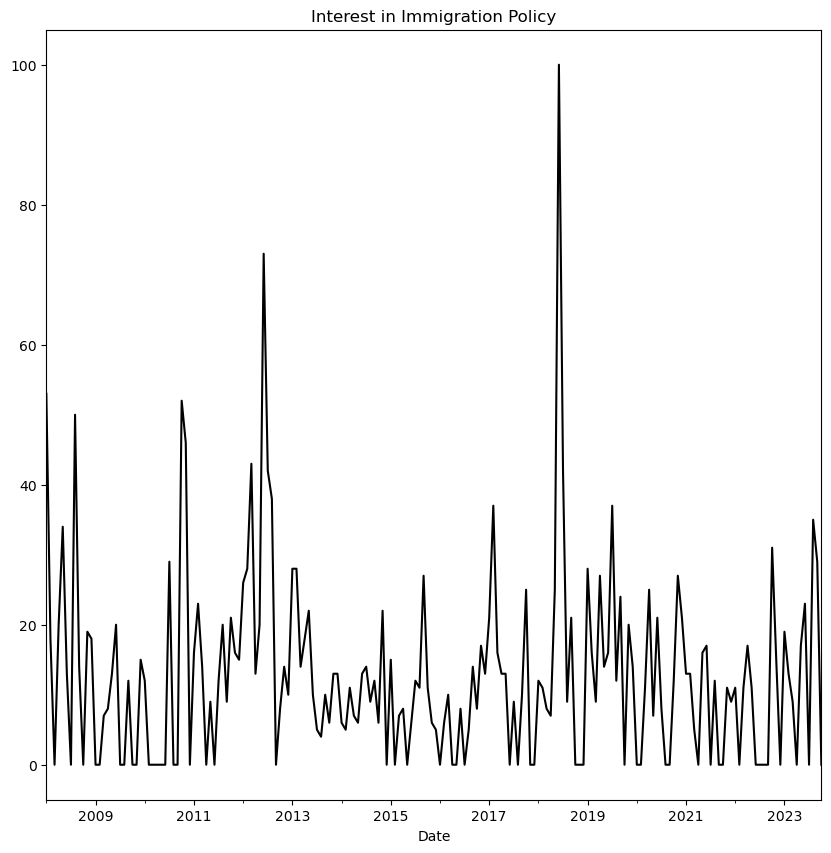

In [111]:
df_trend.plot(x="Date", y=["policy"], figsize=(10,10), color = 'black', 
              legend = False, title = "Interest in Immigration Policy")



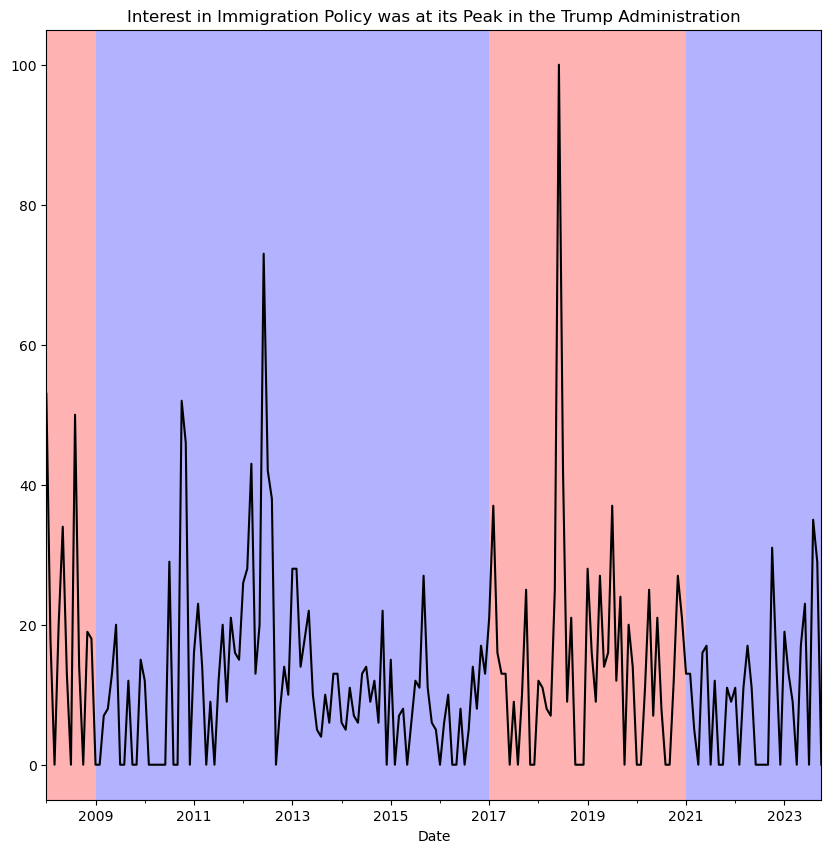

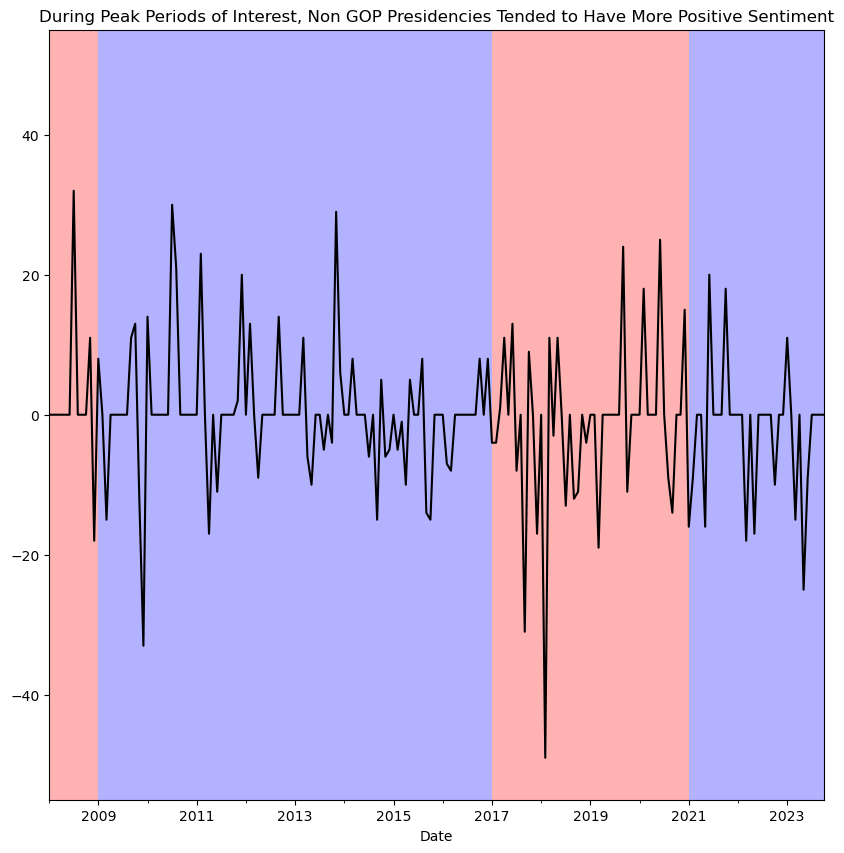

In [118]:
#Adding Political Parties

graph1 = df_trend.plot(x="Date", y=["policy"], figsize=(10,10), color = 'black', 
              legend = False, title = "Interest in Immigration Policy was at its Peak in the Trump Administration")


graph1.axvspan("2008-01-01", "2009-01-19", facecolor='red', alpha=0.3)
graph1.axvspan("2009-01-20", "2017-01-19", facecolor='blue', alpha=0.3)
graph1.axvspan("2017-01-20", "2021-01-19", facecolor='red', alpha=0.3)
graph1.axvspan("2021-01-20", "2023-10-01", facecolor='blue', alpha=0.3)

graph2 = df_trend.plot(x="Date", y=["Overall Sentiment"], figsize=(10,10), color = 'black', legend = False, 
              ylim = (-range - 5 ,range + 5), title = "During Peak Periods of Interest, Non GOP Presidencies Tended to Have More Positive Sentiment", )

graph2.axvspan("2008-01-01", "2009-01-19", facecolor='red', alpha=0.3)
graph2.axvspan("2009-01-20", "2017-01-19", facecolor='blue', alpha=0.3)
graph2.axvspan("2017-01-20", "2021-01-19", facecolor='red', alpha=0.3)
graph2.axvspan("2021-01-20", "2023-10-01", facecolor='blue', alpha=0.3)


In [8]:
# Importing BLS API #Unable to access all of the dates needed due to API key not working

import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps(
    {"seriesid": ['LNS11300060','LNS11300000'],
     "startyear":"2008", 
     "endyear":"2024"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey=789bdd3574864ac682dbf3fed68c42f1', 
                  data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [ ]:
# Due to lack of API access, I am going to run a OLS regression from a df built from two CSV files
